##Importing Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Importing Dataset

In [73]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y), 1)

In [74]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [75]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


##Feature Scaling

In [76]:
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
y_sc = StandardScaler()
X = x_sc.fit_transform(X)
y = y_sc.fit_transform(y)

In [77]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [78]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


##Training The SVR model on The Whole Dataset

In [79]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf') # using Radial Base Function as a kernel
svr_regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

##Predict a New Point

In [80]:
y_pred = y_sc.inverse_transform(svr_regressor.predict(x_sc.transform([[6.5]])))
print("The predicted salary for a scaled level of 6.5 is ", y_pred[0])

The predicted salary for a scaled level of 6.5 is  170370.02040650236


##Visualizing The SVR Results

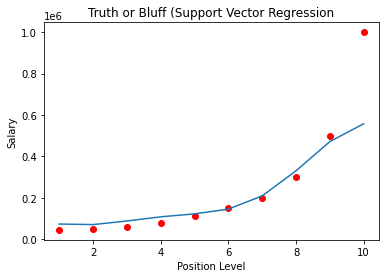

In [84]:
plt.scatter(x_sc.inverse_transform(X), y_sc.inverse_transform(y), color="red")
plt.plot(x_sc.inverse_transform(X), y_sc.inverse_transform(svr_regressor.predict(X)))
plt.title("Truth or Bluff (Support Vector Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

##Visualizing The SVR Results for Higher Resolution and Smoother Curve

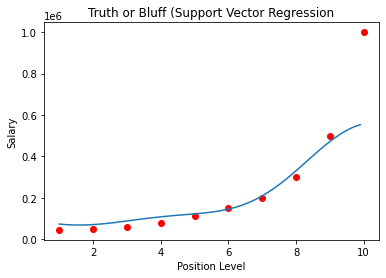

In [86]:
X_grid = np.arange(min(x_sc.inverse_transform(X)), max(x_sc.inverse_transform(X)), 0.1)
X_grid = np.reshape(X_grid, (len(X_grid), 1))
plt.scatter(x_sc.inverse_transform(X), y_sc.inverse_transform(y), color="red")
plt.plot(X_grid, y_sc.inverse_transform(svr_regressor.predict(x_sc.transform(X_grid))))
plt.title("Truth or Bluff (Support Vector Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()